In [4]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
sales=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Files\\sales_06_FY2020-21.csv', low_memory=False)

In [114]:
sales_df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Files\\sales_06_FY2020-21.csv', low_memory=False)

In [111]:
pd.options.display.max_columns=40

In [4]:
##pd.options.display.max_rows=100000

In [113]:
sales.head(4)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,year,month,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,2020,Oct-2020,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,2020,Oct-2020,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,2020,Oct-2020,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,2020,Oct-2020,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0


In [112]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  year              286392 non-null  int64  
 14  month             286392 non-null  object 
 15  Gender            286392 non-null  object 
 16  age               28

In [117]:
sales.drop(['cust_id', 'ref_num', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'User Name'], axis=1, inplace=True)
sales_df.drop(['cust_id', 'ref_num', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'User Name'], axis=1, inplace=True)

In [9]:
sales.head(5)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0


In [11]:
## not possible to extract year/month/day from object column, have to convert it to datetime column first then extract year or month 
 ## sales['order_date'] = pd.to_datetime(sales['order_date'])
 ## sales['Year']=sales['order_date'].dt.year

In [12]:
sales.year.unique()

array([2020, 2021], dtype=int64)

## Which category products are ordered most of times

In [13]:
sales.category.unique()

array(["Men's Fashion", 'Mobiles & Tablets', 'Computing', 'Appliances',
       'Home & Living', "Women's Fashion", 'Health & Sports',
       'Beauty & Grooming', 'Superstore', 'Others', 'Entertainment',
       'Soghaat', 'Kids & Baby', 'Books', 'School & Education'],
      dtype=object)

In [99]:
sales.category.value_counts()

Mobiles & Tablets     61761
Men's Fashion         40713
Appliances            33034
Women's Fashion       28334
Others                26108
Beauty & Grooming     17899
Entertainment         17352
Superstore            15024
Home & Living         13990
Health & Sports        8421
Computing              8110
Soghaat                7250
Kids & Baby            6492
School & Education     1090
Books                   814
Name: category, dtype: int64

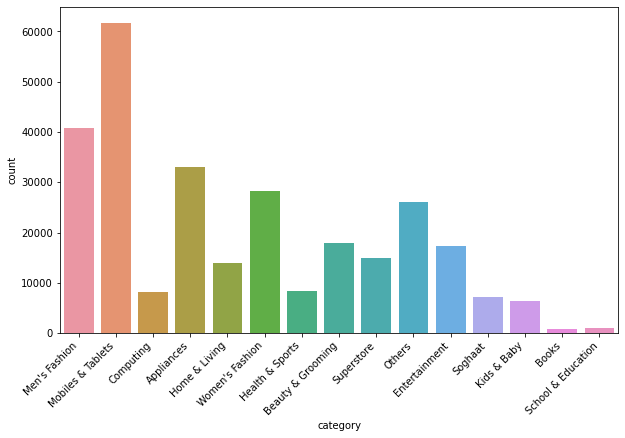

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='category', data=sales)
plt.xticks(rotation=45, ha='right');

## Which payment method is most preffered

In [19]:
sales.payment_method.unique()

array(['cod', 'Payaxis', 'Easypay', 'jazzwallet', 'Easypay_MA',
       'jazzvoucher', 'easypay_voucher', 'customercredit', 'bankalfalah',
       'apg', 'mcblite', 'cashatdoorstep', 'financesettlement'],
      dtype=object)

In [7]:
sales.payment_method.value_counts()

cod                  102916
Easypay               69679
Payaxis               31049
easypay_voucher       29763
bankalfalah           23057
Easypay_MA            11536
jazzwallet             6669
jazzvoucher            6045
customercredit         3702
apg                    1758
mcblite                 208
cashatdoorstep            9
financesettlement         1
Name: payment_method, dtype: int64

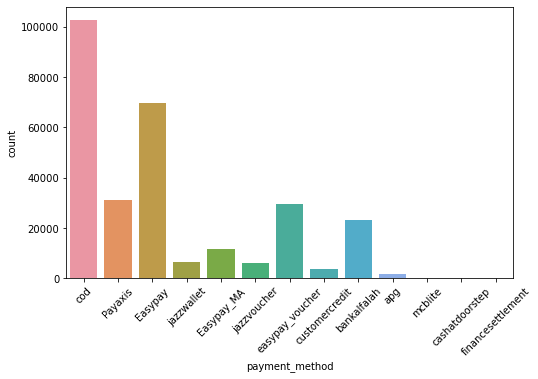

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='payment_method', data=sales)
plt.xticks(rotation=45);

## Which sku has given maximum discount

In [140]:
sales.sku.nunique()

47932

In [56]:
pd.pivot_table(sales, index='sku', values='discount_amount', aggfunc=sum, sort=True)

,discount_amount
sku,
jjp_15000006-100-NIL,0.0
4U_Service_22,0.0
4U_Service_36,0.0
4U_Service_7,0.0
7CF5AFBC3B16A32A,0.0
...,...
xiaomi_mi-c3-32gb-Grey,0.0
zaffiro_Z-P-018,0.0
zaffiro_Z-P-026,0.0


In [55]:
sales.groupby('sku').discount_amount.sum().sort_values(ascending=True)

sku
 jjp_15000006-100-NIL     0.000000e+00
MEFIDO5B03BA4C38768-XL    0.000000e+00
MEFIDO5B03BA52A9140-XL    0.000000e+00
MEFIDO5B03BA609AC72-XL    0.000000e+00
MEFIDO5B03BA6E3E11F-M     0.000000e+00
                              ...     
MATSAM5A0BFFF19C40A       2.639995e+05
MATSAM59DB7583ED7C0       2.896359e+05
MATSAM5A7463EE3C1A5       3.826640e+05
MATSAM59DB757FB47A2       6.860361e+05
MATSAM59DB75ADB2F80       1.125850e+06
Name: discount_amount, Length: 47932, dtype: float64

In [34]:
pd.pivot_table(sales, index='sku', values='Discount_Percent', aggfunc=sum, sort=True)

,Discount_Percent
sku,
jjp_15000006-100-NIL,0.0
4U_Service_22,0.0
4U_Service_36,0.0
4U_Service_7,0.0
7CF5AFBC3B16A32A,0.0
...,...
xiaomi_mi-c3-32gb-Grey,0.0
zaffiro_Z-P-018,0.0
zaffiro_Z-P-026,0.0


In [54]:
sales.groupby('sku').Discount_Percent.sum().sort_values(ascending=True)

sku
 jjp_15000006-100-NIL         0.000000
MEFHOU5AACDD8DC6D91-38        0.000000
MEFHOU5ABCCD80ADC96           0.000000
MEFHOU5ABCD0C51AF8C           0.000000
MEFHOU5ABD1A9F50F28           0.000000
                              ...     
MATSAM59DB757FB47A2       14369.763651
MATTEL5A462528E403F       14579.007518
APPNAT5A0A01860CE92       14653.841673
MATSAM5A7463EE3C1A5       15291.636726
MATSAM59DB75ADB2F80       62018.323185
Name: Discount_Percent, Length: 47932, dtype: float64

In [ ]:
###  (MATSAM59DB75ADB2F80 ) this sku has gives more discount

In [59]:
sales_sku_max_disc=sales[sales['sku']=='MATSAM59DB75ADB2F80' ]

In [60]:
sales_sku_max_disc.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
293,100412711,2020-12-27,complete,673813.0,MATSAM59DB75ADB2F80,3.0,1369.8,2739.6,579.96,2159.64,...,12/8/1999,207-84-0611,225-428-0080,Lake Charles,Calcasieu,Lake Charles,LA,70629,South,21.169514
1176,100424351,2020-12-28,canceled,693220.0,MATSAM59DB75ADB2F80,2.0,1369.8,1369.8,210.99,1158.81,...,12/19/1997,601-99-2887,236-271-2330,Wylliesburg,Charlotte,Wylliesburg,VA,23976,South,15.402979
1177,100424361,2020-12-28,complete,693230.0,MATSAM59DB75ADB2F80,2.0,1369.8,1369.8,210.99,1158.81,...,12/19/1997,601-99-2887,236-271-2330,Wylliesburg,Charlotte,Wylliesburg,VA,23976,South,15.402979


In [63]:
sales_sku_max_disc.discount_amount.sum()

1125849.58992

In [51]:
## to know dicount given by all other sku combine except the sku which has max discount, drop that max giving sku and sum the discount column

In [76]:
sales_df.set_index('sku', inplace=True)

In [48]:
sales_df.head(3)

,order_id,order_date,status,item_id,qty_ordered,price,value,discount_amount,total,category,...,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
sku,,,,,,,,,,,,,,,,,,,,,
oasis_Oasis-064-36,100354678,2020-10-01,received,574772.0,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
Fantastic_FT-48,100354678,2020-10-01,received,574774.0,11.0,19.0,190.0,0.0,190.0,Men's Fashion,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0
mdeal_DMC-610-8,100354680,2020-10-01,complete,574777.0,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,...,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,0.0


In [64]:
sales_df.drop('MATSAM59DB75ADB2F80', axis=0, inplace=True)

In [66]:
sales_df.discount_amount.sum()

18932882.051990002

In [ ]:
## There is huge difference between the sku which has maximum discount and all other sku combine 

## Which sku has maximum sales

In [67]:
sales.groupby('sku').total.sum().sort_values(ascending=True)

sku
MEFBAT5ADEE5F7DC0A6-7    0.000000e+00
WOFDIN59BA413058843      0.000000e+00
BAGNYX5A65894AB5D41      0.000000e+00
MEFSHA59ADDC7EA2811      0.000000e+00
BAGNYX5A095AC07FA01      0.000000e+00
                             ...     
MATSAM5B1509B4696EA      2.500298e+06
MATSAM5B10F91A9B6AB      2.670725e+06
MATSAM59DB757FB47A2      4.807788e+06
MATSAM59DB75ADB2F80      4.972349e+06
MATSAM5B10F7E2AC8C1      7.437177e+06
Name: total, Length: 47932, dtype: float64

In [7]:
pd.pivot_table(sales, index='sku', values='total', aggfunc=sum, sort=True)

,total
sku,
jjp_15000006-100-NIL,328.5
4U_Service_22,112.0
4U_Service_36,21.6
4U_Service_7,62.5
7CF5AFBC3B16A32A,359.0
...,...
xiaomi_mi-c3-32gb-Grey,4350.0
zaffiro_Z-P-018,333.6
zaffiro_Z-P-026,179.0


In [68]:
## (MATSAM5B10F7E2AC8C1) tis sku has more sale

## To understand what is the total sales combine of all sku except the sku who has maximum sales

In [174]:
sales_df.head(3)

,order_id,order_date,status,item_id,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
sku,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
oasis_Oasis-064-36,100354678,2020-10-01,received,574772.0,21.0,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
Fantastic_FT-48,100354678,2020-10-01,received,574774.0,11.0,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
mdeal_DMC-610-8,100354680,2020-10-01,complete,574777.0,9.0,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124.0,2020,Oct-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [77]:
## to get total sales combine drop the sku which is giving maximum sales
sales_df.drop('MATSAM5B10F7E2AC8C1', axis=0, inplace=True)

In [78]:
sales_df.total.sum()

226213017.73208994

In [ ]:
## concluded that the sku who has maximum sales value is less than the sales value of all the other combine

## Which category has more sales

In [79]:
pd.pivot_table(sales, values='total', index='category', aggfunc=sum)

,total
category,
Appliances,3.006084e+07
Beauty & Grooming,2.644748e+06
Books,3.241695e+04
Computing,9.362343e+06
Entertainment,2.713843e+07
Health & Sports,1.019958e+06
Home & Living,1.810582e+06
Kids & Baby,8.562133e+05
Men's Fashion,4.820147e+06


In [80]:
sales.groupby('category').total.sum().sort_values(ascending=True)

category
Books                 3.241695e+04
School & Education    1.147401e+05
Soghaat               5.766999e+05
Kids & Baby           8.562133e+05
Health & Sports       1.019958e+06
Home & Living         1.810582e+06
Beauty & Grooming     2.644748e+06
Superstore            2.886907e+06
Men's Fashion         4.820147e+06
Women's Fashion       6.649842e+06
Computing             9.362343e+06
Others                1.556433e+07
Entertainment         2.713843e+07
Appliances            3.006084e+07
Mobiles & Tablets     1.301120e+08
Name: total, dtype: float64

In [83]:
plt.figure(figsize=(8,8))
sns.set_style('dark')
sns.barplot(x='category', y='total', data= sales)
plt.xticks(rotation=45)
plt.yticks(np.arange(0,2500,200))
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.title('Total Sales', fontsize=20, fontstyle='italic')
for x, y in zip(sales.category, sales.total):
    label=y
    plt.annotate(label,(x,y), fontsize=16);

ConversionError: Failed to convert value(s) to axis units: "Men's Fashion"

<Figure size 576x576 with 1 Axes>

## Which payment mode is most preffered in high selling category

In [104]:
mobile_tablet=sales[sales['category']=='Mobiles & Tablets']

In [136]:
mobile_tablet.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
6,100367360,2020-11-13,order_refunded,595192.0,MATDAN59C3C845B38F0,2.0,47.6,47.6,0.0,47.6,Mobiles & Tablets,cod,Valid,60124.0,2020,Nov-2020,987867,Drs.,Jani,W,Titus,F,43.0,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
7,100354677,2020-10-01,canceled,574769.0,GFE_19_USBLEDLight,2.0,49.0,49.0,0.0,49.0,Mobiles & Tablets,Payaxis,Gross,42485.0,2020,Oct-2020,171143,Prof.,Lee,S,Eaker,M,28.0,"Eaker, Lee",lee.eaker@gmail.com,2/4/1981,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0
48,100354685,2020-10-01,canceled,574788.0,cc_samsung_a320-black,2.0,3139.2,3139.2,0.0,3139.2,Mobiles & Tablets,Payaxis,Gross,51286.0,2020,Oct-2020,167242,Ms.,Drema,T,Galle,F,64.0,"Galle, Drema",drema.galle@gmail.com,10/19/2016,652-62-4375,229-364-7348,Farmington,Oconee,Farmington,GA,30638,South,dtgalle,0.0


In [137]:
mobile_tablet.payment_method.value_counts()

Easypay              15620
cod                  11913
easypay_voucher      11828
Payaxis               9001
bankalfalah           7352
jazzvoucher           2595
Easypay_MA            2012
jazzwallet             658
customercredit         442
apg                    294
mcblite                 36
cashatdoorstep           9
financesettlement        1
Name: payment_method, dtype: int64

<AxesSubplot:xlabel='count', ylabel='payment_method'>

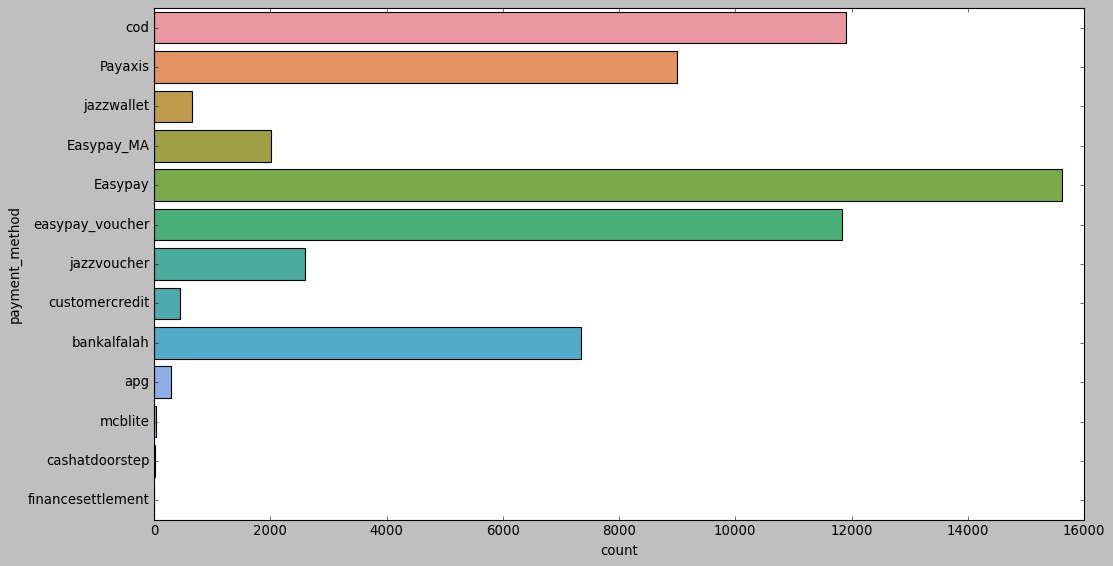

In [110]:
plt.figure(figsize=(15,8))
sns.countplot(y='payment_method', data=mobile_tablet)
##for y in zip(x, mobile_tablet.payment_method):
    ##label=x
    ##plt.annotate(label,(x,y));

In [19]:
for x in sales.category:
    print(x)
    for y in sales.total:
        if y is max:
            print(y)

Men's Fashion
Men's Fashion
Men's Fashion
Men's Fashion
Men's Fashion
Men's Fashion
Mobiles & Tablets
Mobiles & Tablets


KeyboardInterrupt: 

## Which customer is giving maximum bussiness

In [20]:
sales.full_name.nunique()

64212

In [21]:
pd.pivot_table(sales, index='full_name', values='total' ,aggfunc=sum, sort=True)

,total
full_name,
"Aaron, Dottie",301.14
"Aaron, Gene",34.80
"Aaron, Vernon",2059.90
"Aarons, Louie",4204.20
"Aarons, Lynelle",2760.40
...,...
"Zylstra, Ethelene",7107.00
"Zylstra, Marivel",329.50
"Zylstra, Mikel",50.00


In [23]:
sales.groupby('full_name').total.sum().sort_values(ascending=True)

full_name
Burgett, Cristopher          0.00
Wooster, Sydney              0.00
Genovese, Eryn               0.00
Palmore, Samuel              0.00
Ikard, Danita                0.00
                          ...    
Beebe, Hortencia       1295994.58
Jauregui, Bianca       1368422.60
Bhatt, Graham          1568177.60
Cobb, Joleen           1628440.10
Dobbins, Everette      1900289.90
Name: total, Length: 64212, dtype: float64

In [27]:
cust=sales[sales['full_name']=='Dobbins, Everette']

In [28]:
cust.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,year,month,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
262916,100532250,2021-06-21,received,853739.0,MATAPP5A7AAB91AD66F,2.0,14204.0,14204.0,0.0,14204.0,Mobiles & Tablets,bankalfalah,Valid,2021,Jun-2021,M,39.0,"Dobbins, Everette",everette.dobbins@aol.com,6/12/1991,356-08-0619,228-279-2621,Noxapater,Winston,Noxapater,MS,39346,South,0.000000
262917,100532250,2021-06-21,received,853740.0,ENTSON5A69C1DD26B24,2.0,9583.3,9583.3,0.0,9583.3,Entertainment,bankalfalah,Valid,2021,Jun-2021,M,39.0,"Dobbins, Everette",everette.dobbins@aol.com,6/12/1991,356-08-0619,228-279-2621,Noxapater,Winston,Noxapater,MS,39346,South,0.000000
262918,100532252,2021-06-21,received,853743.0,MATSAM5A9F892ECDF73,1.0,10169.9,0.0,0.0,0.0,Mobiles & Tablets,bankalfalah,Valid,2021,Jun-2021,M,39.0,"Dobbins, Everette",everette.dobbins@aol.com,6/12/1991,356-08-0619,228-279-2621,Noxapater,Winston,Noxapater,MS,39346,South,7.500005


In [29]:
cust.total.sum()

1900289.9000000001

## Which is the category, the person who is giving maximum bussiness is shopping more

In [30]:
pd.pivot_table(cust, index='category', values='total', aggfunc=sum)

,total
category,
Appliances,12478.9
Beauty & Grooming,766.0
Entertainment,88590.7
Home & Living,1700.0
Men's Fashion,1598.8
Mobiles & Tablets,1795155.5


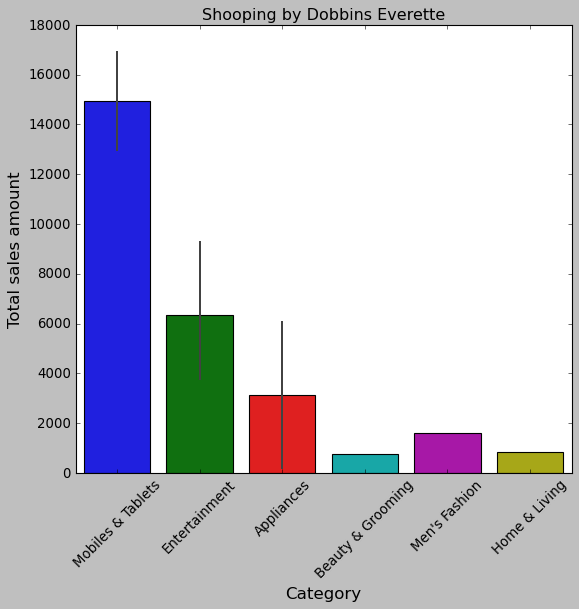

In [35]:
plt.style.use('classic')
plt.figure(figsize=(8,7))
sns.barplot(y='total', x='category', data=cust)
plt.xlabel('Category', fontsize=15)
plt.ylabel('Total sales amount', fontsize=15)
plt.xticks(rotation=45)
plt.title('Shooping by Dobbins Everette');
##for x,y in zip(cust.category, cust.total):
    ##label=y
    ##plt.annotate(label,(x,y));

## Which region has highest sales

In [9]:
sales.Region.nunique()

4

In [11]:
pd.pivot_table(sales, index='Region', values='total', aggfunc=sum)

,total
Region,
Midwest,6.292063e+07
Northeast,3.996425e+07
South,8.964785e+07
West,4.111747e+07


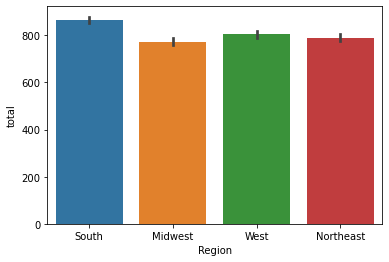

In [12]:
sns.barplot(x='Region', y='total', data=sales);

## Which County has highest sales

In [11]:
sales.County.nunique()

2551

In [36]:
pd.pivot_table(sales, index='County', values='total', aggfunc=sum, sort=True)

,total
County,
Aaron,993.600
Abbeville,1757.200
Acadia,34697.447
Accomack,327710.338
Ada,237886.918
...,...
Zeona,918.000
Zephyrhills,10566.363
Ziebach,15208.990


In [37]:
sales.groupby('County').total.sum().sort_values(ascending=True)

County
New Hartford    0.000000e+00
Cholame         0.000000e+00
Peacock         0.000000e+00
Blackford       0.000000e+00
Minneapolis     0.000000e+00
                    ...     
Polk            1.848129e+06
Winston         1.949392e+06
Jefferson       2.145536e+06
Monroe          2.173749e+06
Los Angeles     2.835745e+06
Name: total, Length: 2551, dtype: float64

## Within the county which State has maximum sale

In [38]:
los_angeles=sales[sales['County']=='Los Angeles']

In [39]:
los_angeles.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,year,month,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
210,100354706,2020-10-01,canceled,574823.0,Anex_Anex_AG-174 Jucier Blender Grinder,2.0,445.0,445.0,0.0,445.0,Appliances,Payaxis,Gross,2020,Oct-2020,M,46.0,"Henrich, Wallace",wallace.henrich@yahoo.com,11/10/2015,478-43-6707,209-649-0095,El Monte,Los Angeles,El Monte,CA,91734,West,0.0
211,100354706,2020-10-01,canceled,574824.0,ZA_qmobile_NoirE14G-Gold,3.0,1279.9,2559.8,0.0,2559.8,Mobiles & Tablets,Payaxis,Gross,2020,Oct-2020,M,46.0,"Henrich, Wallace",wallace.henrich@yahoo.com,11/10/2015,478-43-6707,209-649-0095,El Monte,Los Angeles,El Monte,CA,91734,West,0.0
212,100354706,2020-10-01,canceled,574825.0,Lenovo-K6Karate-Gold,2.0,1690.0,1690.0,0.0,1690.0,Mobiles & Tablets,Payaxis,Gross,2020,Oct-2020,M,46.0,"Henrich, Wallace",wallace.henrich@yahoo.com,11/10/2015,478-43-6707,209-649-0095,El Monte,Los Angeles,El Monte,CA,91734,West,0.0


In [40]:
los_angeles.State.nunique()

1

In [41]:
pd.pivot_table(los_angeles, index='State', values='total', aggfunc=sum)

,total
State,
CA,2.835745e+06


## Which state giving more business

In [43]:
sales.State.nunique()

51

In [44]:
sales.groupby('State').total.sum().sort_values(ascending=True)

State
RI    3.058381e+05
DE    4.815116e+05
HI    6.218324e+05
WY    1.034336e+06
DC    1.311284e+06
NH    1.331460e+06
NV    1.360255e+06
ID    1.678923e+06
CT    1.893172e+06
UT    1.957998e+06
SD    1.959410e+06
AK    1.967323e+06
NM    2.193450e+06
SC    2.303708e+06
ND    2.420395e+06
OR    2.496124e+06
VT    2.751958e+06
NE    2.829867e+06
ME    2.846749e+06
AZ    3.116258e+06
MD    3.123252e+06
KS    3.260089e+06
MT    3.276356e+06
AR    3.708783e+06
LA    3.729478e+06
WA    3.765998e+06
CO    3.772435e+06
AL    3.802490e+06
WI    4.067436e+06
MA    4.180137e+06
OK    4.244667e+06
TN    4.530630e+06
NJ    5.130792e+06
GA    5.162799e+06
MI    5.181664e+06
WV    5.284802e+06
MN    5.384620e+06
IA    6.254494e+06
IN    6.307449e+06
NC    6.363723e+06
MS    6.485483e+06
KY    6.994809e+06
MO    8.000870e+06
OH    8.147443e+06
VA    8.193937e+06
FL    8.459037e+06
IL    9.106895e+06
PA    1.015904e+07
NY    1.136510e+07
CA    1.387618e+07
TX    1.546746e+07
Name: total, dtype: float

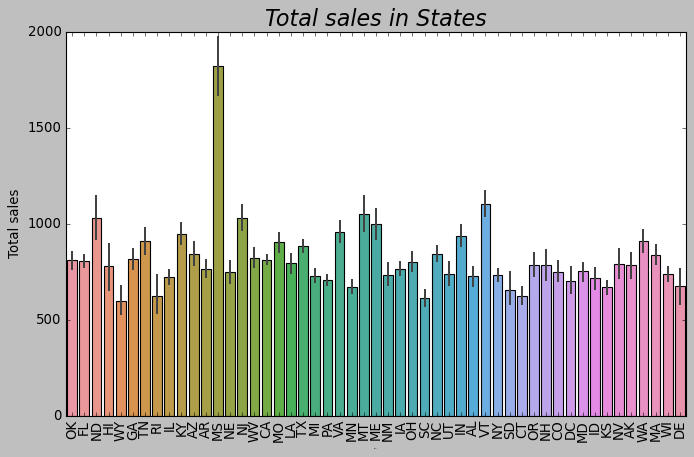

In [101]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='total', data=sales)
plt.xlabel('States', fontsize=1)
plt.ylabel('Total sales')
plt.xticks(rotation=90)
plt.title('Total sales in States', fontsize=20, fontstyle='italic');

## Within State which city has maximum sale

In [52]:
sales_tx=sales[sales['State']=='TX']

In [53]:
sales_tx.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,year,month,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
346,100354721,2020-10-01,complete,574860.0,NDF_Fry Seeds-long,4.0,21.3,63.9,0.0,63.9,Soghaat,Payaxis,Net,2020,Oct-2020,F,45.0,"Grantham, Heidy",heidy.grantham@gmail.com,11/29/2003,620-85-6406,210-589-2683,Baytown,Harris,Baytown,TX,77522,South,0.0
347,100354721,2020-10-01,complete,574861.0,cr_PUMPKIN SEEDS LARGE,2.0,22.5,22.5,0.0,22.5,Soghaat,Payaxis,Net,2020,Oct-2020,F,45.0,"Grantham, Heidy",heidy.grantham@gmail.com,11/29/2003,620-85-6406,210-589-2683,Baytown,Harris,Baytown,TX,77522,South,0.0
348,100357650,2020-10-17,order_refunded,580149.0,KABEDE59AC17AAD4BBD-2-3 Years,2.0,220.0,220.0,0.0,220.0,Kids & Baby,Payaxis,Valid,2020,Oct-2020,F,45.0,"Grantham, Heidy",heidy.grantham@gmail.com,11/29/2003,620-85-6406,210-589-2683,Baytown,Harris,Baytown,TX,77522,South,0.0


In [54]:
sales_tx.City.nunique()

1188

In [57]:
sales_tx.groupby('City').total.sum().sort_values(ascending=True)

City
Raymondville    0.000000e+00
Bend            0.000000e+00
Springlake      0.000000e+00
Dayton          0.000000e+00
Crosbyton       0.000000e+00
                    ...     
Sour Lake       6.299461e+05
El Paso         6.305386e+05
San Antonio     6.632424e+05
Austin          6.909021e+05
Houston         1.069884e+06
Name: total, Length: 1188, dtype: float64

In [58]:
## Huston city has more sale around $1069884

## Within City which place has maximum sale

In [60]:
sales_houston=sales_tx[sales_tx['City']=='Houston']

In [61]:
sales_houston.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,year,month,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
2019,100354838,2020-10-01,complete,575078.0,Fpakistan_FP041,2.0,87.4,87.4,0.0,87.4,Home & Living,cod,Net,2020,Oct-2020,M,26.0,"Pando, Reynaldo",reynaldo.pando@aol.com,10/10/2013,049-15-5023,210-541-3813,Houston,Harris,Houston,TX,77033,South,0.0
9494,100355803,2020-10-06,complete,576859.0,sanaulla_MAH17L2 2A,2.0,169.0,169.0,0.0,169.0,Women's Fashion,cod,Net,2020,Oct-2020,F,51.0,"Folks, Karma",karma.folks@ibm.com,4/5/2015,656-36-8224,210-699-4648,Houston,Harris,Houston,TX,77269,South,0.0
9495,100431603,2021-01-02,complete,705575.0,WOFGUL59C243394F6ED,2.0,245.0,245.0,0.0,245.0,Women's Fashion,cod,Net,2021,Jan-2021,F,51.0,"Folks, Karma",karma.folks@ibm.com,4/5/2015,656-36-8224,210-699-4648,Houston,Harris,Houston,TX,77269,South,0.0


In [63]:
sales_houston['Place Name'].unique()

array(['Houston'], dtype=object)

In [ ]:
## so the sales is same as houston city

## Analysis on order status

In [64]:
sales.status.unique()

array(['received', 'complete', 'order_refunded', 'canceled', 'refund',
       'cod', 'paid', 'processing', 'closed', 'pending', 'pending_paypal',
       'payment_review', 'holded'], dtype=object)

In [65]:
## check the count of each order status

In [66]:
sales.status.value_counts()

canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: status, dtype: int64

In [67]:
## concluded that the order is cancelled by customers most of the time

## In which category the order is getting cancelled most of the time

In [69]:
cancel_order=sales[sales['status']=='canceled']

In [70]:
cancel_order.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,year,month,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
7,100354677,2020-10-01,canceled,574769.0,GFE_19_USBLEDLight,2.0,49.0,49.0,0.0,49.0,Mobiles & Tablets,Payaxis,Gross,2020,Oct-2020,M,28.0,"Eaker, Lee",lee.eaker@gmail.com,2/4/1981,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,0.0
8,100354677,2020-10-01,canceled,574770.0,oasis_Kingston-32GB-DTIG4,2.0,135.0,135.0,0.0,135.0,Computing,Payaxis,Gross,2020,Oct-2020,M,28.0,"Eaker, Lee",lee.eaker@gmail.com,2/4/1981,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,0.0
9,100354677,2020-10-01,canceled,574771.0,Geepas_GSB5420,2.0,549.9,549.9,0.0,549.9,Appliances,Payaxis,Gross,2020,Oct-2020,M,28.0,"Eaker, Lee",lee.eaker@gmail.com,2/4/1981,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,0.0


In [73]:
cancel_order.category.value_counts()

Mobiles & Tablets     30271
Others                17312
Appliances            13559
Men's Fashion         11342
Women's Fashion        8204
Entertainment          7661
Beauty & Grooming      5025
Superstore             4760
Home & Living          4095
Computing              3561
Soghaat                2536
Kids & Baby            1908
Health & Sports        1478
School & Education      328
Books                   126
Name: category, dtype: int64

In [84]:
## Which region, county, state, city the order getting canceled

In [85]:
cancel_order.Region.value_counts()

South        40929
Midwest      31004
West         20299
Northeast    19934
Name: Region, dtype: int64

In [86]:
cancel_order.County.value_counts()

Jefferson            1511
Los Angeles          1199
Washington           1035
Montgomery            992
Polk                  894
                     ... 
Ben Arnold              1
Ridgeville              1
Culver                  1
Five Forks              1
Sebastians Branch       1
Name: County, Length: 2282, dtype: int64

In [87]:
cancel_order.State.value_counts()

TX    7014
CA    6378
NY    5896
PA    5784
IL    4357
FL    4279
OH    3871
MN    3302
VA    3276
MO    3273
IA    3261
KY    3148
NC    3132
IN    2881
MI    2690
WV    2437
GA    2292
OK    2287
CO    2267
WI    2126
NJ    2032
MA    1957
AR    1919
TN    1852
LA    1850
KS    1850
AL    1849
WA    1735
MD    1586
SC    1570
NE    1494
MS    1493
MT    1348
AZ    1348
OR    1300
ME    1239
VT    1140
NM    1139
CT    1125
AK    1065
SD    1056
UT    1047
ID    1012
ND     843
WY     763
DC     695
NV     631
NH     600
HI     266
DE     250
RI     161
Name: State, dtype: int64

In [88]:
cancel_order.City.value_counts()

Washington        764
Kittanning        692
Sedgwick          591
New York City     552
Houston           452
                 ... 
Manton              1
Justice             1
East Worcester      1
Powersville         1
Valera              1
Name: City, Length: 11526, dtype: int64

In [89]:
## try to understand reason behind such huge cancelation
## for that lets have look oon dicount_amount column of datadrame

In [94]:
cancel_order.discount_amount.mean()

71.89875479013557

In [95]:
## average dicount is just $71 may be this is the main reason

## Filterout the customer who cancels his/her order most of the times

In [75]:
cancel_order.full_name.value_counts()

Bailes, Eulah         685
Melo, Liz             590
Braddy, Percy         421
Beebe, Hortencia      387
Bhatt, Graham         222
                     ... 
Rix, Franklin           1
Barge, Stephen          1
Rivas, Deshawn          1
Chittenden, Leigha      1
Nowak, Shaina           1
Name: full_name, Length: 30661, dtype: int64

In [76]:
## "Bailes Eulah" canceled his order most of the time

In [77]:
## lets see in which category he is cancelling his order

In [79]:
bailes_canc=cancel_order[cancel_order['full_name']=='Bailes, Eulah']

In [81]:
bailes_canc.head(3)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,year,month,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,Discount_Percent
187578,100460154,2021-03-24,canceled,755277.0,MATQMO5A83E7751D666,2.0,845.0,845.0,0.0,845.0,Mobiles & Tablets,Easypay,Gross,2021,Mar-2021,F,52.0,"Bailes, Eulah",eulah.bailes@gmail.com,2/8/2017,077-02-1900,215-203-6895,Kittanning,Armstrong,Kittanning,PA,16201,Northeast,0.0
187579,100465097,2021-03-31,canceled,763158.0,MATQMO5A83E7751D666,2.0,845.0,845.0,0.0,845.0,Mobiles & Tablets,Easypay,Gross,2021,Mar-2021,F,52.0,"Bailes, Eulah",eulah.bailes@gmail.com,2/8/2017,077-02-1900,215-203-6895,Kittanning,Armstrong,Kittanning,PA,16201,Northeast,0.0
187580,100465098,2021-03-31,canceled,763159.0,MATRON5A45DB4964F49,2.0,62.5,62.5,0.0,62.5,Mobiles & Tablets,Easypay,Gross,2021,Mar-2021,F,52.0,"Bailes, Eulah",eulah.bailes@gmail.com,2/8/2017,077-02-1900,215-203-6895,Kittanning,Armstrong,Kittanning,PA,16201,Northeast,0.0


In [82]:
bailes_canc.category.value_counts()

Men's Fashion        396
Mobiles & Tablets    271
Soghaat               13
Others                 3
Entertainment          2
Name: category, dtype: int64